## mqttPlotQakEvents.py

connected to broker  broker.hivemq.com
subscribing to unibo/qak/events
collecting values; please wait ...
evMsg= msg(sonarRobot,event,sonar,none,sonar(5),146) 5.0
evMsg= msg(sonarRobot,event,sonar,none,sonar(111),156) 111.0
evMsg= msg(sonarRobot,event,sonar,none,sonar(100),166) 100.0
evMsg plot= msg(sonarRobot,event,sonar,none,sonar(16),167) msgnum= sonar(16)


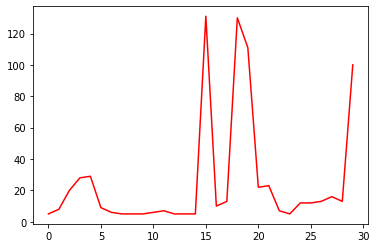

bye


In [4]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="broker.hivemq.com"
duration = 20
x        = []
y        = []
z        = []
goon     = True
msgnum   = 0 
###  msg(sonarRobot,event,sonar,none,sonar(V),N)
def on_message(client, userdata, message) :   #define callback
    global msgnum,  x,y,z, goon
    if not goon :
        return
    evMsg   = str( message.payload.decode("utf-8")  )
    msgitems = evMsg.split(",")
    if msgnum < 30  :
        msgnum = msgnum + 1
        vz = float( msgitems[4].split('(')[1].split(')')[0] )
        if msgnum % 10 == 0  :
            print("evMsg=", evMsg, vz   )  
        x.append( vz )
    else  :
        print("evMsg plot=", evMsg, "msgnum=",  msgitems[4] )
        plt.plot(list(x), color='red')
        plt.show()
        goon = False
        client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback

client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe

print("collecting values; please wait ..." )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        
